In [1]:
# Import libraries
import pandas as pd
import numpy as np
pd.set_option('max_colwidth', 400)
import requests
import matplotlib.pyplot as plt
import json
import re
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import tensorflow as tf
import datetime as dt

In [2]:
# Read csv from raw github link and create dataframe
url = 'https://raw.githubusercontent.com/dianeooty/datascience_salary/main/Resources/layoffs_cleaned.csv'
layoffs_df = pd.read_csv(url)

In [3]:
# Read csv from raw github link and create dataframe
url = 'https://raw.githubusercontent.com/dianeooty/datascience_salary/main/Resources/salaries_cleaned.csv'
salaries_df = pd.read_csv(url)

In [4]:
# View dataframe info
salaries_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62642 entries, 0 to 62641
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Unnamed: 0               62642 non-null  int64  
 1   timestamp                62642 non-null  object 
 2   date                     62642 non-null  object 
 3   company                  62637 non-null  object 
 4   level                    62523 non-null  object 
 5   title                    62642 non-null  object 
 6   totalyearlycompensation  62642 non-null  int64  
 7   location                 62642 non-null  object 
 8   latitude                 62642 non-null  float64
 9   longitude                62642 non-null  float64
 10  yearsofexperience        62642 non-null  float64
 11  yearsatcompany           62642 non-null  float64
 12  basesalary               62642 non-null  int64  
 13  stockgrantvalue          62642 non-null  int64  
 14  bonus                 

In [5]:
# Display dataframe
salaries_df = salaries_df.drop(columns='Unnamed: 0')
salaries_df.head()

,timestamp,date,company,level,title,totalyearlycompensation,location,latitude,longitude,yearsofexperience,yearsatcompany,basesalary,stockgrantvalue,bonus,gender,Race,Education
0,2017-06-07 11:33:00,2017-06-07 00:00:00,Oracle,L3,Product Manager,127000,"Redwood City, CA",37.486324,-122.232523,1.5,1.5,107000,20000,10000,Unknown,Unknown,Unknown
1,2017-06-10 17:11:00,2017-06-10 00:00:00,eBay,SE 2,Software Engineer,100000,"San Francisco, CA",37.779026,-122.419906,5.0,3.0,0,0,0,Unknown,Unknown,Unknown
2,2017-06-11 14:53:00,2017-06-11 00:00:00,Amazon,L7,Product Manager,310000,"Seattle, WA",47.603832,-122.330062,8.0,0.0,155000,0,0,Unknown,Unknown,Unknown
3,2017-06-17 00:23:00,2017-06-17 00:00:00,Apple,M1,Software Engineering Manager,372000,"Sunnyvale, CA",37.368830,-122.036349,7.0,5.0,157000,180000,35000,Unknown,Unknown,Unknown
4,2017-06-20 10:58:00,2017-06-20 00:00:00,Microsoft,60,Software Engineer,157000,"Mountain View, CA",37.389389,-122.083210,5.0,3.0,0,0,0,Unknown,Unknown,Unknown


In [6]:
# Add columns for month and year separated
salaries_df['year'] = pd.DatetimeIndex(salaries_df['date']).year
salaries_df['month'] = pd.DatetimeIndex(salaries_df['date']).month
salaries_df.head()

,timestamp,date,company,level,title,totalyearlycompensation,location,latitude,longitude,yearsofexperience,yearsatcompany,basesalary,stockgrantvalue,bonus,gender,Race,Education,year,month
0,2017-06-07 11:33:00,2017-06-07 00:00:00,Oracle,L3,Product Manager,127000,"Redwood City, CA",37.486324,-122.232523,1.5,1.5,107000,20000,10000,Unknown,Unknown,Unknown,2017,6
1,2017-06-10 17:11:00,2017-06-10 00:00:00,eBay,SE 2,Software Engineer,100000,"San Francisco, CA",37.779026,-122.419906,5.0,3.0,0,0,0,Unknown,Unknown,Unknown,2017,6
2,2017-06-11 14:53:00,2017-06-11 00:00:00,Amazon,L7,Product Manager,310000,"Seattle, WA",47.603832,-122.330062,8.0,0.0,155000,0,0,Unknown,Unknown,Unknown,2017,6
3,2017-06-17 00:23:00,2017-06-17 00:00:00,Apple,M1,Software Engineering Manager,372000,"Sunnyvale, CA",37.368830,-122.036349,7.0,5.0,157000,180000,35000,Unknown,Unknown,Unknown,2017,6
4,2017-06-20 10:58:00,2017-06-20 00:00:00,Microsoft,60,Software Engineer,157000,"Mountain View, CA",37.389389,-122.083210,5.0,3.0,0,0,0,Unknown,Unknown,Unknown,2017,6


# Top Salaried Companies

<AxesSubplot:title={'center':'Top 20 Highest Paying Companies'}, xlabel='Company', ylabel='Average Annual Compensation (in Millions, $)'>

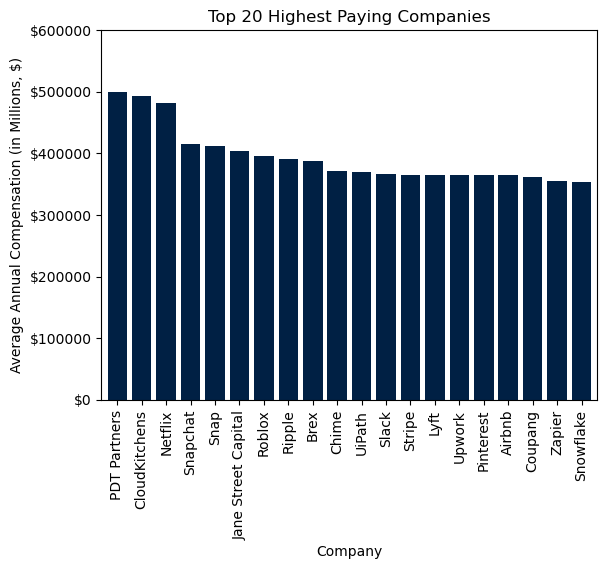

In [8]:
# Graph Top 20 Highest Paying Companies (on Average)
mean = salaries_df.groupby('company').mean()['totalyearlycompensation']
ordered_mean = mean.sort_values(ascending=False)[:20]

top_paying = ordered_mean.plot(kind='bar', width=0.8, color='#002044')
top_paying.set_title("Top 20 Highest Paying Companies")
top_paying.set_xlabel("Company")
top_paying.set_ylim(0, 600000)

top_paying.yaxis.set_major_formatter('${x:1.0f}')
top_paying.set_ylabel("Average Annual Compensation (in Millions, $)")
top_paying

In [13]:
# Get the output for drawing bar chart in Javascript (Xiaolin)
ordered_mean.tolist()

[500000.0,
 493000.0,
 481376.8656716418,
 414333.3333333333,
 411166.6666666667,
 404562.5,
 395915.25423728814,
 390625.0,
 387952.38095238095,
 372000.0,
 369913.04347826086,
 366297.2972972973,
 365300.5780346821,
 365291.41104294476,
 364800.0,
 364481.7518248175,
 364284.4827586207,
 360931.0344827586,
 354875.0,
 354050.0]

In [26]:
# Get the companies names for the xasis of the bar chart in Javascript (Xiaolin)
ordered_mean.index

Index(['PDT Partners', 'CloudKitchens', 'Netflix', 'Snapchat', 'Snap',
       'Jane Street Capital', 'Roblox', 'Ripple', 'Brex', 'Chime', 'UiPath',
       'Slack', 'Stripe', 'Lyft', 'Upwork', 'Pinterest', 'Airbnb', 'Coupang',
       'Zapier', 'Snowflake'],
      dtype='object', name='company')

In [14]:
count = salaries_df.groupby('company').count()['totalyearlycompensation']
twoplus_salaries = count<=2

In [15]:
# Finding the details of the salary ranges within a company 
salary_mean = salaries_df.groupby('company').mean()['totalyearlycompensation']
salary_min = salaries_df.groupby('company').min()['totalyearlycompensation']
salary_max = salaries_df.groupby('company').max()['totalyearlycompensation']
salary_count = salaries_df.groupby('company').count()['totalyearlycompensation']

# Assemble the information into a DataFrame
salary_summary = pd.DataFrame({"Mean Salary": salary_mean, "Min Salary": salary_min, 
                               "Max Salary": salary_max, "Number of Salaries": salary_count})
salary_summary.sort_values(by=["Mean Salary"], ascending=False).head(20)


,Mean Salary,Min Salary,Max Salary,Number of Salaries
company,,,,
PDT Partners,500000.000000,250000,1100000,5
CloudKitchens,493000.000000,265000,700000,10
Netflix,481376.865672,120000,893000,268
Snapchat,414333.333333,160000,900000,6
Snap,411166.666667,85000,2500000,198
Jane Street Capital,404562.500000,145000,1030000,16
Roblox,395915.254237,130000,1290000,59
Ripple,390625.000000,132000,1110000,8
Brex,387952.380952,120000,765000,21


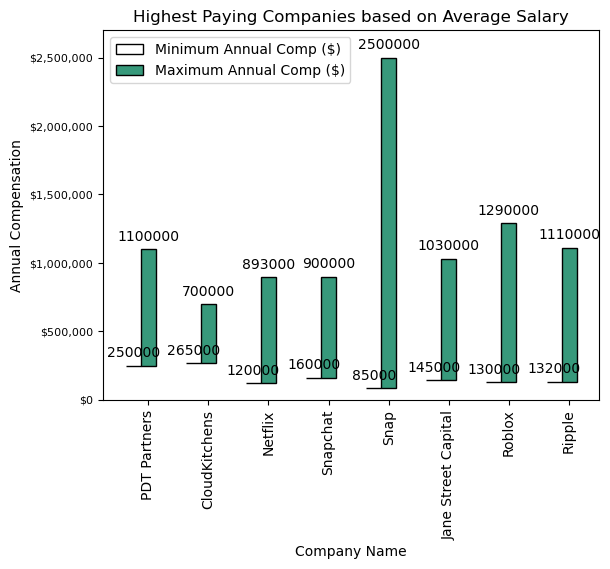

In [16]:
# Hat graph for highest paying companies (on average) IF they have more than 1 salary datapoint

def hat_graph(ax, xlabels, values, group_labels):
    # Parameters:
    # ax: Axes to plot into
    # xlabels: list of str - categories to put on x-axis -- COMPANY
    # values: (M, N) array-like - data values
        # Rows are the groups (len(group_labels) == M).
        # Columns are the categories (len(xlabels) == N).
    # group_labels: list of str - Labels displayed in legend
    
    def label_bars(height, rects):
        # Text labels on top of each bar
        for height, rect in zip(height, rects):
            ax.annotate(f'{height}',
                       xy = (rect.get_x() + rect.get_width() / 2, height),
                       xytext=(0,4),
                       textcoords='offset points',
                       ha='center', va='bottom')
    values = np.asarray(values)
    x = np.arange(values.shape[1])
    ax.set_xticks(x, labels=xlabels)
    spacing=0.5
    width = (1-spacing) / values.shape[0]
    heights0 = values[0]
    for i, (heights, group_label) in enumerate(zip(values, group_labels)):
        style = {'fill': False} if i == 0 else {'edgecolor': 'black'}
        rects = ax.bar(x - spacing/2 + i * width, heights - heights0, 
                      width, bottom=heights0, label=group_label, color='#37997B', **style)
        label_bars(heights, rects)

# Create Arrays
xlabels = ['PDT Partners', 'CloudKitchens', 'Netflix', 'Snapchat', 'Snap', 'Jane Street Capital', 'Roblox', 'Ripple']
MinSalary = np.array([250000, 265000, 120000, 160000, 85000, 145000, 130000, 132000])    
MaxSalary = np.array([1100000, 700000, 893000, 900000, 2500000, 1030000, 1290000, 1110000])

fig, ax = plt.subplots()
hat_graph(ax, xlabels, [MinSalary, MaxSalary], ['Minimum Annual Comp ($)', 'Maximum Annual Comp ($)'])

# Format Graph
ax.set_xlabel("Company Name")
plt.xticks(rotation=90)
ax.set_ylabel("Annual Compensation")
ax.set_ylim(0, 2700000)
plt.yticks(fontsize=8)
ax.yaxis.set_major_formatter('${x:,.0f}')
ax.set_title("Highest Paying Companies based on Average Salary")
ax.legend()

plt.show()

# Reference: https://matplotlib.org/stable/gallery/lines_bars_and_markers/hat_graph.html

# Average Pay by Year by Job Title

In [17]:
# Average pay by year
avg_pay_byyr = salaries_df.groupby('year').mean()['totalyearlycompensation']
avg_pay_byyr

year
2017    249300.000000
2018    246749.552246
2019    231922.691930
2020    213888.791447
2021    205980.876766
Name: totalyearlycompensation, dtype: float64

In [18]:
# Job titles and counts
salaries_df['title'].value_counts()

Software Engineer               41231
Product Manager                  4673
Software Engineering Manager     3569
Data Scientist                   2578
Hardware Engineer                2200
Product Designer                 1516
Technical Program Manager        1381
Solution Architect               1157
Management Consultant             976
Business Analyst                  885
Marketing                         710
Mechanical Engineer               490
Sales                             461
Recruiter                         451
Human Resources                   364
Name: title, dtype: int64

In [19]:
# Average salary by job title
salaries_df.groupby('title').mean()['totalyearlycompensation']

title
Business Analyst                129727.683616
Data Scientist                  203656.710628
Hardware Engineer               213655.000000
Human Resources                 178711.538462
Management Consultant           162795.081967
Marketing                       198971.830986
Mechanical Engineer             158442.857143
Product Designer                207637.203166
Product Manager                 257813.396105
Recruiter                       155580.931264
Sales                           214273.318872
Software Engineer               205403.992287
Software Engineering Manager    354635.752312
Solution Architect              212736.387208
Technical Program Manager       237099.927589
Name: totalyearlycompensation, dtype: float64

In [20]:
#yr17 = salaries_df[(salaries_df["year"] == 2017)]
yr18 = salaries_df[(salaries_df["year"] == 2018)]
yr19 = salaries_df[(salaries_df["year"] == 2019)]
yr20 = salaries_df[(salaries_df["year"] == 2020)]
yr21 = salaries_df[(salaries_df["year"] == 2021)]

In [21]:
#scores17 = yr17.groupby('title').mean()['totalyearlycompensation']
scores18 = yr18.groupby('title').mean()['totalyearlycompensation']
scores19 = yr19.groupby('title').mean()['totalyearlycompensation']
scores20 = yr20.groupby('title').mean()['totalyearlycompensation']
scores21 = yr21.groupby('title').mean()['totalyearlycompensation']

In [40]:
#pay_title_year = pd.DataFrame({"2017": scores17, "2018": scores18, "2019": scores19,
#                                    "2020": scores20, "2021": scores21})
pay_title_year = pd.DataFrame({"2018": scores18, "2019": scores19,
                                    "2020": scores20, "2021": scores21})
pay_title_year.index.name = None

pay_title_year.style.format('${0:,.2f}')

,2018,2019,2020,2021
Business Analyst,"$149,000.00","$116,714.29","$124,845.10","$134,720.18"
Data Scientist,"$226,503.88","$211,633.64","$202,522.36","$198,522.79"
Hardware Engineer,"$238,000.00","$221,420.92","$219,348.84","$204,625.00"
Human Resources,"$170,000.00","$200,857.14","$179,453.12","$176,951.22"
Management Consultant,$nan,$nan,"$158,977.64","$166,675.62"
Marketing,"$100,000.00","$271,428.57","$200,464.79","$196,268.01"
Mechanical Engineer,$nan,"$113,875.00","$155,619.77","$163,461.19"
Product Designer,"$210,266.67","$213,052.42","$208,917.46","$203,468.92"
Product Manager,"$276,988.32","$263,759.63","$249,851.03","$258,598.56"
Recruiter,"$170,000.00","$179,000.00","$152,938.46","$158,741.94"


In [41]:
# Get the data for bar chart in Javascript: Average Salary by Title in USD (Xiaolin)
# Convert series to dictonary
data18 = scores18.to_dict()
data19 = scores19.to_dict()
data20 = scores20.to_dict()
data21 = scores21.to_dict()

dict18 = {}
dict18['id'] = "2018"
dict18['metadata'] = data18

dict19 = {}
dict19['id'] = "2019"
dict19['metadata'] = data19

dict20 = {}
dict20['id'] = "2020"
dict20['metadata'] = data20

dict21 = {}
dict21['id'] = "2021"
dict21['metadata'] = data21

data = [dict18, dict19, dict20, dict21]
data

[{'id': '2018',
  'metadata': {'Business Analyst': 149000.0,
   'Data Scientist': 226503.87596899224,
   'Hardware Engineer': 238000.0,
   'Human Resources': 170000.0,
   'Marketing': 100000.0,
   'Product Designer': 210266.66666666666,
   'Product Manager': 276988.31775700935,
   'Recruiter': 170000.0,
   'Sales': 566500.0,
   'Software Engineer': 231179.47594323294,
   'Software Engineering Manager': 374254.23728813557,
   'Solution Architect': 244271.18644067796,
   'Technical Program Manager': 261500.0}},
 {'id': '2019',
  'metadata': {'Business Analyst': 116714.28571428571,
   'Data Scientist': 211633.64055299538,
   'Hardware Engineer': 221420.92457420923,
   'Human Resources': 200857.14285714287,
   'Marketing': 271428.5714285714,
   'Mechanical Engineer': 113875.0,
   'Product Designer': 213052.4193548387,
   'Product Manager': 263759.62815405044,
   'Recruiter': 179000.0,
   'Sales': 312555.55555555556,
   'Software Engineer': 219398.03498682004,
   'Software Engineering Manag

# LAYOFF DATA

In [28]:
# Read csv from raw github link and create dataframe
url = 'https://raw.githubusercontent.com/dianeooty/datascience_salary/main/Resources/layoffs_cleaned.csv'
layoffs_df = pd.read_csv(url)

In [29]:
# Check dataframe's info
layoffs_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2545 entries, 0 to 2544
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Unnamed: 0           2545 non-null   int64  
 1   company              2545 non-null   object 
 2   location             2545 non-null   object 
 3   industry             2543 non-null   object 
 4   total_laid_off       2545 non-null   int64  
 5   percentage_laid_off  1694 non-null   float64
 6   date                 2543 non-null   object 
 7   stage                2539 non-null   object 
 8   country              2545 non-null   object 
dtypes: float64(1), int64(2), object(6)
memory usage: 179.1+ KB


In [30]:
# Display dataframe
layoffs_df = layoffs_df.drop(columns='Unnamed: 0')
layoffs_df.head()

,company,location,industry,total_laid_off,percentage_laid_off,date,stage,country
0,N26,Berlin,Finance,71,4.0,2023-04-28,Series E,United States
1,Providoor,Melbourne,Food,0,100.0,2023-04-28,Unknown,Australia
2,Dropbox,SF Bay Area,Other,500,16.0,2023-04-27,Post-IPO,United States
3,Vroom,New York City,Transportation,120,11.0,2023-04-27,Post-IPO,United States
4,Greenhouse,New York City,Recruiting,100,12.0,2023-04-27,Private Equity,United States


In [31]:
# Remove null dates 
layoffs_df = layoffs_df.dropna(subset = ['date'])
layoffs_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2543 entries, 0 to 2542
Data columns (total 8 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   company              2543 non-null   object 
 1   location             2543 non-null   object 
 2   industry             2541 non-null   object 
 3   total_laid_off       2543 non-null   int64  
 4   percentage_laid_off  1693 non-null   float64
 5   date                 2543 non-null   object 
 6   stage                2537 non-null   object 
 7   country              2543 non-null   object 
dtypes: float64(1), int64(1), object(6)
memory usage: 178.8+ KB


In [32]:
# Copy layoffs_df
new_layoff_df = layoffs_df

# Create a dataframe to hold only the STEM companies found in salaries_df
stem_df = new_layoff_df[new_layoff_df['company'].isin(salaries_df['company'])]

stem_df.head()

,company,location,industry,total_laid_off,percentage_laid_off,date,stage,country
0,N26,Berlin,Finance,71,4.0,2023-04-28,Series E,United States
2,Dropbox,SF Bay Area,Other,500,16.0,2023-04-27,Post-IPO,United States
11,Alteryx,Los Angeles,Data,0,11.0,2023-04-27,Post-IPO,United States
19,Red Hat,Raleigh,Other,760,4.0,2023-04-24,Acquired,United States
21,Lyft,SF Bay Area,Transportation,1072,26.0,2023-04-21,Post-IPO,United States


In [33]:
stem_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 492 entries, 0 to 2511
Data columns (total 8 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   company              492 non-null    object 
 1   location             492 non-null    object 
 2   industry             491 non-null    object 
 3   total_laid_off       492 non-null    int64  
 4   percentage_laid_off  325 non-null    float64
 5   date                 492 non-null    object 
 6   stage                492 non-null    object 
 7   country              492 non-null    object 
dtypes: float64(1), int64(1), object(6)
memory usage: 34.6+ KB


In [34]:
# Remove null dates 
stem_df = stem_df.dropna(subset = ['date'])
stem_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 492 entries, 0 to 2511
Data columns (total 8 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   company              492 non-null    object 
 1   location             492 non-null    object 
 2   industry             491 non-null    object 
 3   total_laid_off       492 non-null    int64  
 4   percentage_laid_off  325 non-null    float64
 5   date                 492 non-null    object 
 6   stage                492 non-null    object 
 7   country              492 non-null    object 
dtypes: float64(1), int64(1), object(6)
memory usage: 34.6+ KB


In [35]:
import datetime

# Add columns for month and year separated
layoffs_df['year'] = pd.DatetimeIndex(layoffs_df['date']).year
layoffs_df['month'] = pd.DatetimeIndex(layoffs_df['date']).month
layoffs_df.head()

,company,location,industry,total_laid_off,percentage_laid_off,date,stage,country,year,month
0,N26,Berlin,Finance,71,4.0,2023-04-28,Series E,United States,2023,4
1,Providoor,Melbourne,Food,0,100.0,2023-04-28,Unknown,Australia,2023,4
2,Dropbox,SF Bay Area,Other,500,16.0,2023-04-27,Post-IPO,United States,2023,4
3,Vroom,New York City,Transportation,120,11.0,2023-04-27,Post-IPO,United States,2023,4
4,Greenhouse,New York City,Recruiting,100,12.0,2023-04-27,Private Equity,United States,2023,4


In [36]:
# Add columns for month and year separated
stem_df['year'] = pd.DatetimeIndex(stem_df['date']).year
stem_df['month'] = pd.DatetimeIndex(stem_df['date']).month
stem_df.head()

,company,location,industry,total_laid_off,percentage_laid_off,date,stage,country,year,month
0,N26,Berlin,Finance,71,4.0,2023-04-28,Series E,United States,2023,4
2,Dropbox,SF Bay Area,Other,500,16.0,2023-04-27,Post-IPO,United States,2023,4
11,Alteryx,Los Angeles,Data,0,11.0,2023-04-27,Post-IPO,United States,2023,4
19,Red Hat,Raleigh,Other,760,4.0,2023-04-24,Acquired,United States,2023,4
21,Lyft,SF Bay Area,Transportation,1072,26.0,2023-04-21,Post-IPO,United States,2023,4


# Total Layoffs

In [37]:
# Number of people laid off each year
layoffs_year = layoffs_df.groupby('year').sum()['total_laid_off']
layoffs_year

year
2020     80998
2021     15823
2022    164511
2023    185136
Name: total_laid_off, dtype: int64

In [38]:
# Number of people laid off each year from STEM
stemlayoffs_year = stem_df.groupby('year').sum()['total_laid_off']
stemlayoffs_year

year
2020     44655
2021      5800
2022     70315
2023    105147
Name: total_laid_off, dtype: int64

In [39]:
layoffs_year = layoffs_df.groupby('year').sum()['total_laid_off']
stemlayoffs_year = stem_df.groupby('year').sum()['total_laid_off']


# Assemble the information into a DataFrame
total_Layoffs = pd.DataFrame({"All Layoffs": layoffs_year, "Stem Layoffs": stemlayoffs_year})
total_Layoffs


,All Layoffs,Stem Layoffs
year,,
2020,80998,44655
2021,15823,5800
2022,164511,70315
2023,185136,105147


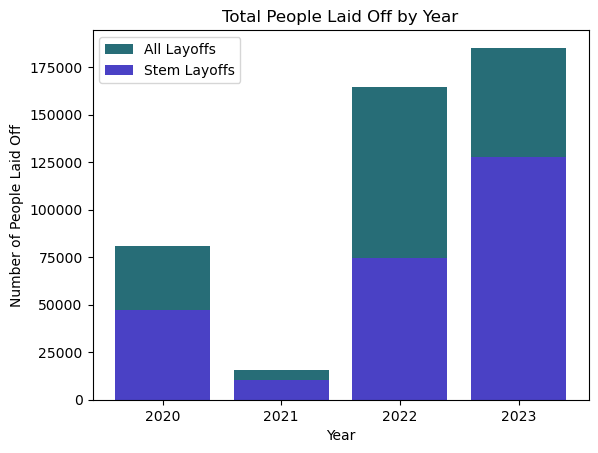

In [42]:
       
# Create Arrays
years = ['2020', '2021', '2022', '2023']
StemLayoffs = np.array([47035, 10300, 74555, 127750])    
AllLayoffs = np.array([80998, 15823, 164511, 185136])

plt.bar(years, AllLayoffs, color= '#276D77')
plt.bar(years, StemLayoffs, color='#4a41c5')

plt.xlabel("Year")
plt.ylabel("Number of People Laid Off")
plt.legend(["All Layoffs", "Stem Layoffs"])
plt.title("Total People Laid Off by Year")
plt.show()



<AxesSubplot:xlabel='year'>

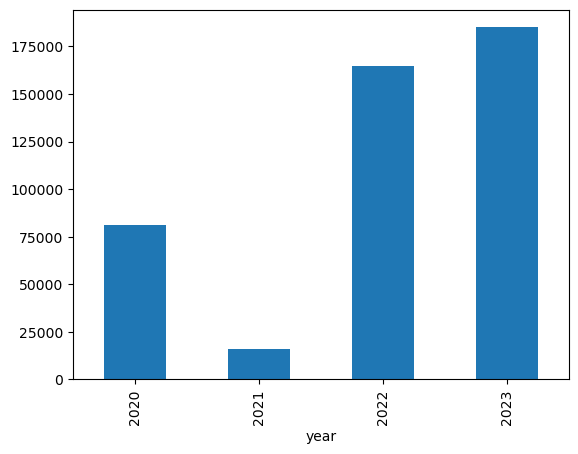

In [43]:
layoffs_year.plot(kind='bar')

<AxesSubplot:xlabel='year'>

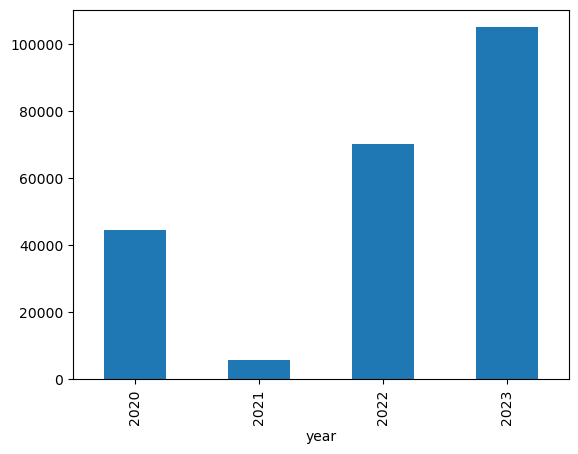

In [44]:
stemlayoffs_year.plot(kind='bar')

# Trend of layoffs by Quarter

In [45]:
import seaborn as sns
import datetime
layoffs_df['date'] = pd.to_datetime(layoffs_df['date'])
layoffs_df.dtypes

company                        object
location                       object
industry                       object
total_laid_off                  int64
percentage_laid_off           float64
date                   datetime64[ns]
stage                          object
country                        object
year                            int64
month                           int64
dtype: object

In [46]:
stem_df['date'] = pd.to_datetime(stem_df['date'])
stem_df.dtypes

company                        object
location                       object
industry                       object
total_laid_off                  int64
percentage_laid_off           float64
date                   datetime64[ns]
stage                          object
country                        object
year                            int64
month                           int64
dtype: object

In [47]:
quarters = layoffs_df.groupby(layoffs_df['date'].dt.to_period('Q'))


In [48]:
all_lay = layoffs_df.groupby(layoffs_df['date'].dt.to_period('Q'))['total_laid_off'].sum()
all_lay

date
2020Q1      9628
2020Q2     60141
2020Q3      9690
2020Q4      1539
2021Q1      7728
2021Q2      2695
2021Q3      2108
2021Q4      3292
2022Q1      9909
2022Q2     35257
2022Q3     35159
2022Q4     84186
2023Q1    166647
2023Q2     18489
Freq: Q-DEC, Name: total_laid_off, dtype: int64

In [64]:
# Get the quarter for the label of the area chart in Javascript (Xiaolin)
all_lay.index

PeriodIndex(['2020Q1', '2020Q2', '2020Q3', '2020Q4', '2021Q1', '2021Q2',
             '2021Q3', '2021Q4', '2022Q1', '2022Q2', '2022Q3', '2022Q4',
             '2023Q1', '2023Q2'],
            dtype='period[Q-DEC]', name='date')

In [62]:
# Get the all layoffs data for the area chart in Javascript (Xiaolin)
all_lay.tolist()

[9628,
 60141,
 9690,
 1539,
 7728,
 2695,
 2108,
 3292,
 9909,
 35257,
 35159,
 84186,
 166647,
 18489]

<AxesSubplot:xlabel='date'>

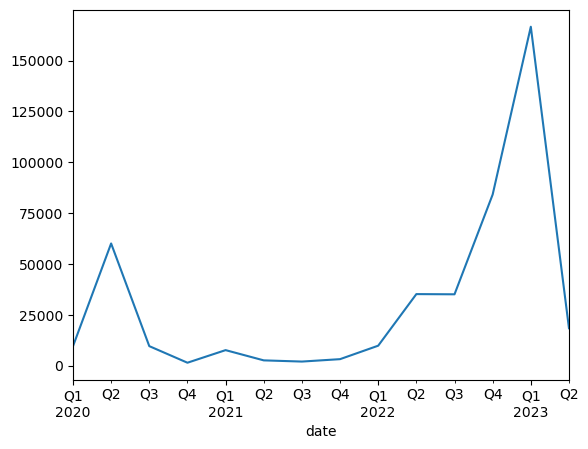

In [55]:
# Time trends for layoffs - Quarters
all_lay.plot(kind='line')

In [56]:
stem_lay = stem_df.groupby(stem_df['date'].dt.to_period('Q'))['total_laid_off'].sum()
stem_lay

date
2020Q1      2982
2020Q2     34591
2020Q3      6452
2020Q4       630
2021Q1      3252
2021Q2       196
2021Q3        30
2021Q4      2322
2022Q1      3970
2022Q2     10674
2022Q3     13593
2022Q4     42078
2023Q1    101271
2023Q2      3876
Freq: Q-DEC, Name: total_laid_off, dtype: int64

In [61]:
# Get the STEM layoffs data for the area chart in Javascript (Xiaolin)
stem_lay.tolist()

[2982,
 34591,
 6452,
 630,
 3252,
 196,
 30,
 2322,
 3970,
 10674,
 13593,
 42078,
 101271,
 3876]

<AxesSubplot:xlabel='date'>

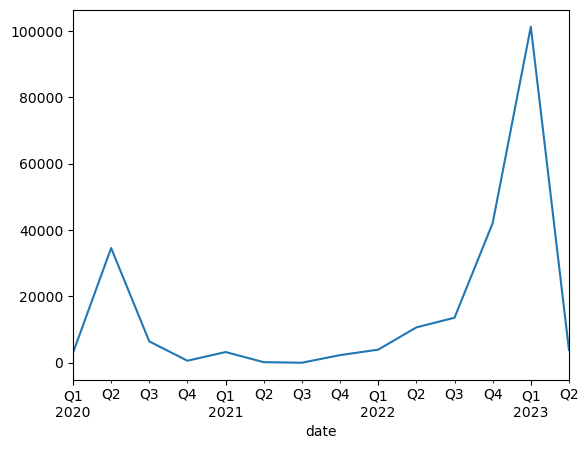

In [57]:
# Time trends for stem layoffs - Quarters
stem_lay.plot(kind='line')

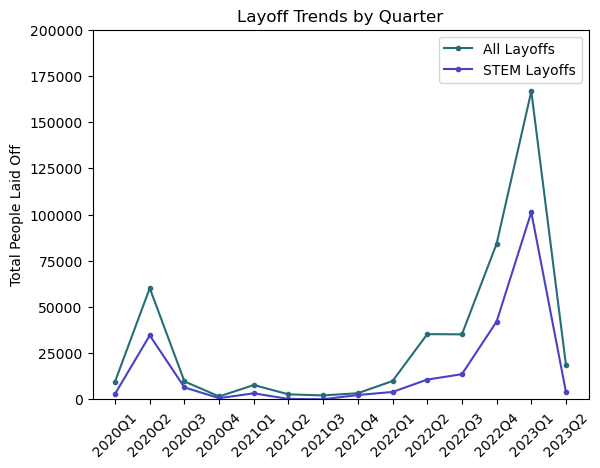

In [65]:
# Side by side, layoffs by quarter 
x = ['2020Q1', '2020Q2', '2020Q3', '2020Q4', '2021Q1', '2021Q2', '2021Q3', '2021Q4', '2022Q1', '2022Q2', '2022Q3', '2022Q4', '2023Q1', '2023Q2']
y = all_lay
y1 = stem_lay

plt.plot(x, y, label = "All Layoffs", color = "#276D77", marker='.')
plt.plot(x, y1, label = "STEM Layoffs", color = "#4a41c5", marker='.')
plt.xticks(rotation=45)
plt.ylabel("Total People Laid Off")
plt.ylim(0, 200000)
plt.legend()
plt.title("Layoff Trends by Quarter")

plt.show()


# Layoffs by Location

In [66]:
# Number of people laid off by city
layoffs_city = layoffs_df.groupby('location').sum()['total_laid_off'].sort_values(ascending=False)
layoffs_city

location
SF Bay Area      145051
Seattle           44741
New York City     29976
Bengaluru         22686
Amsterdam         17140
                  ...  
Montevideo            0
Saskatoon             0
Houston               0
Selangor              0
Accra                 0
Name: total_laid_off, Length: 205, dtype: int64

<AxesSubplot:xlabel='location'>

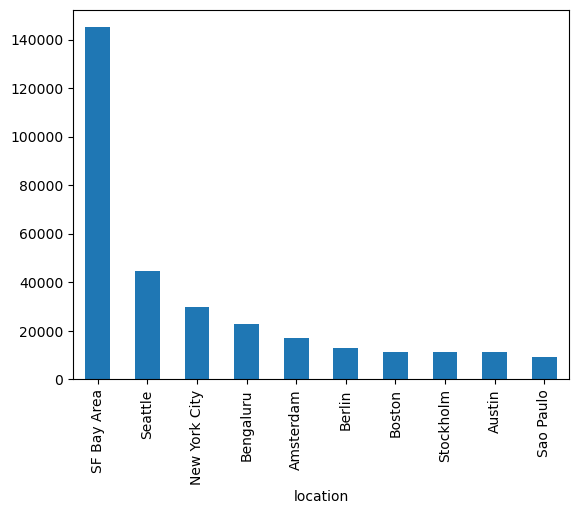

In [67]:
# Number of people laid off by city
layoffs_city_graph = layoffs_df.groupby('location').sum()['total_laid_off'].sort_values(ascending=False).head(10).plot(kind='bar')
layoffs_city_graph

<AxesSubplot:xlabel='location'>

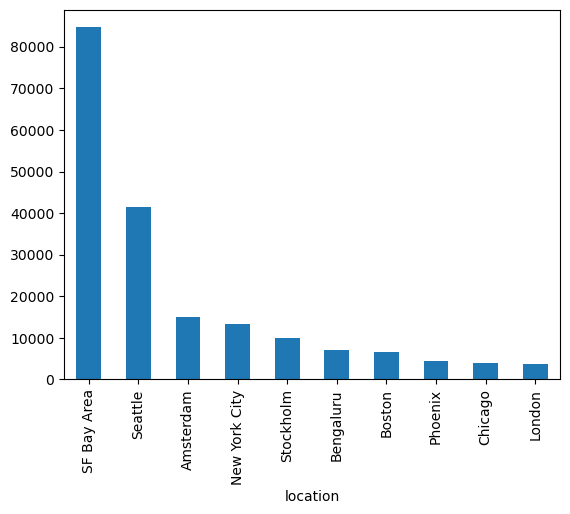

In [68]:
# Number of people laid off by city - STEM
layoffs_city_graph1 = stem_df.groupby('location').sum()['total_laid_off'].sort_values(ascending=False).head(10).plot(kind='bar')
layoffs_city_graph1

In [69]:
# Only looking at US Cities
USCities = layoffs_df[(layoffs_df["country"] == "United States")]
layoffs_UScity = USCities.groupby('location').sum()['total_laid_off'].sort_values(ascending=False)
layoffs_UScity

location
SF Bay Area      145021
Seattle           44741
New York City     29976
Boston            11458
Austin            11199
                  ...  
Fayetteville          0
Richmond              0
New Haven             0
Providence            0
New Hope              0
Name: total_laid_off, Length: 96, dtype: int64

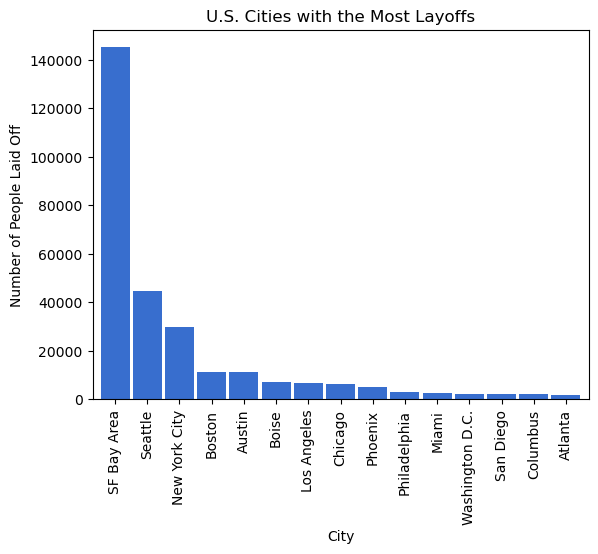

In [70]:
# US Cities graphed
layoffs_UScity_graph = USCities.groupby('location').sum()['total_laid_off'].sort_values(ascending=False).head(15).plot(kind='bar', width=0.9, color='#386ece', xlabel="City", ylabel="Number of People Laid Off", title="U.S. Cities with the Most Layoffs")


In [71]:
# US Cities - STEM
USCitiesSTEM = stem_df[(stem_df["country"] == "United States")]
layoffs_UScitySTEM = USCitiesSTEM.groupby('location').sum()['total_laid_off'].sort_values(ascending=False)
layoffs_UScitySTEM

location
SF Bay Area        84648
Seattle            41533
New York City      13233
Boston              6726
Phoenix             4530
Chicago             3950
Los Angeles         3030
Austin              2951
Philadelphia        2400
Washington D.C.     1564
San Diego           1303
Columbus            1267
Miami               1265
Detroit             1180
Atlanta             1100
Salt Lake City       760
Raleigh              760
St. Louis            700
Oxford               450
Charlotte            350
Pittsburgh           323
San Antonio          275
Grand Rapids         226
Baton Rouge          200
Las Vegas            165
Denver               162
Portland             120
Berlin                71
Dallas                 0
Lehi                   0
Boise                  0
Name: total_laid_off, dtype: int64

<AxesSubplot:title={'center':'US Cities with the Most STEM Layoffs'}, xlabel='City', ylabel='Number of People Laid Off'>

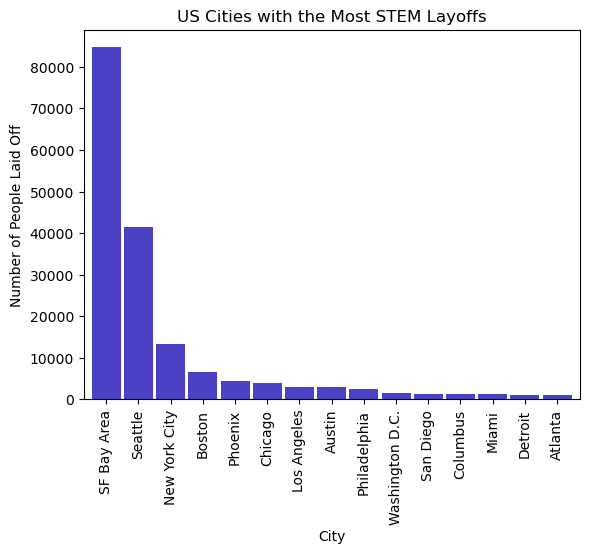

In [72]:
# US Cities graphed - STEM
layoffs_UScitySTEM_graph = USCitiesSTEM.groupby('location').sum()['total_laid_off'].sort_values(ascending=False).head(15).plot(kind='bar', width=0.9, color='#4a41c5', xlabel="City", ylabel="Number of People Laid Off", title="US Cities with the Most STEM Layoffs")

layoffs_UScitySTEM_graph

# Layoffs By Company

In [73]:
# Number of people laid off by company
layoffs_company = layoffs_df.groupby('company').sum()['total_laid_off'].sort_values(ascending=False)
layoffs_company

company
Amazon           27150
Meta             21000
Google           12000
Salesforce       10090
Philips          10000
                 ...  
RateGenius           0
Reach                0
Dispatch             0
Digital Surge        0
 E Inc.              0
Name: total_laid_off, Length: 2019, dtype: int64

<AxesSubplot:ylabel='company'>

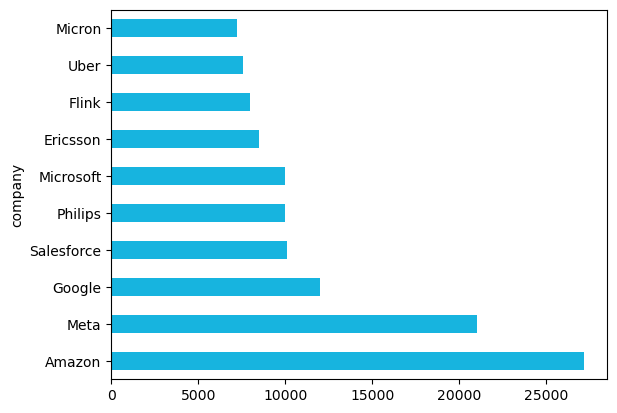

In [74]:
# Number of people laid off by company
layoffs_company_graph = layoffs_df.groupby('company').sum()['total_laid_off'].sort_values(ascending=False).head(10).plot(kind='barh', color='#17b4df')
layoffs_company_graph

<AxesSubplot:ylabel='company'>

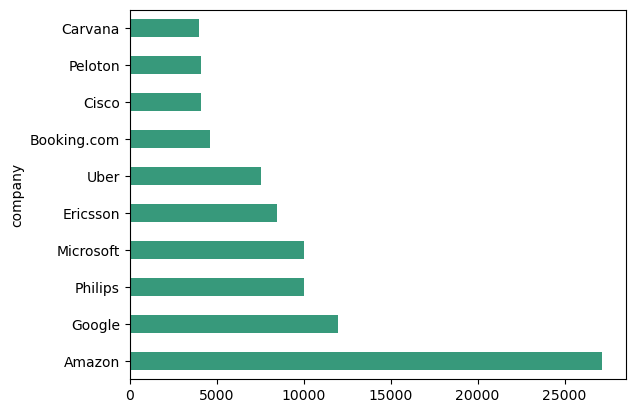

In [75]:
# Number of people laid off by company - STEM
layoffs_company_graph1 = stem_df.groupby('company').sum()['total_laid_off'].sort_values(ascending=False).head(10).plot(kind='barh', color= '#37997B')
layoffs_company_graph1

# Layoffs by Company Stage

In [76]:
# Number of people laid off by stage
layoffs_stage = layoffs_df.groupby('stage').sum()['total_laid_off'].sort_values(ascending=False)
layoffs_stage

stage
Post-IPO          243650
Unknown            42931
Acquired           35605
Series B           24442
Series C           21104
Series D           19563
Series E           13376
Series F           10324
Private Equity      8087
Series H            7344
Series A            6703
Series G            3697
Series J            3570
Series I            2855
Seed                1801
Subsidiary          1094
Name: total_laid_off, dtype: int64

<AxesSubplot:xlabel='stage'>

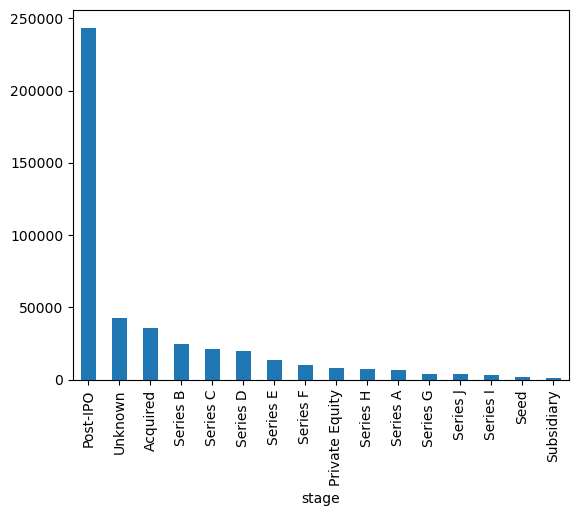

In [77]:
# Number of people laid off by stage
layoffs_stage.plot(kind='bar')

In [78]:
# Number of people laid off by stage - STEM
layoffs_stage1 = stem_df.groupby('stage').sum()['total_laid_off'].sort_values(ascending=False)
layoffs_stage1

stage
Post-IPO          167873
Acquired           20499
Unknown             6869
Series F            5890
Series H            4300
Series E            4243
Series J            3420
Series D            2942
Series I            2770
Private Equity      2417
Series C            2106
Series G            1467
Series B             912
Subsidiary           209
Name: total_laid_off, dtype: int64

<AxesSubplot:xlabel='stage'>

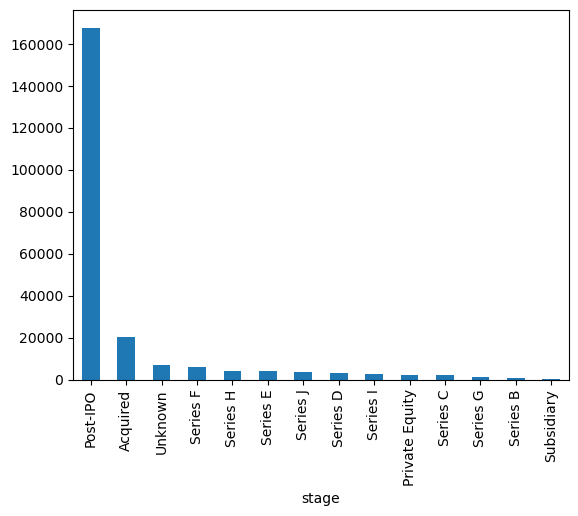

In [79]:
# Number of people laid off by stage
layoffs_stage1.plot(kind='bar')

# Layoffs by Industry

In [80]:
# Number of people laid off by Industry
layoffs_ind = layoffs_df.groupby('industry').sum()['total_laid_off']
layoffs_ind

industry
Aerospace           661
Construction       3863
Consumer          56340
Crypto            10785
Data               5899
Education         14169
Energy              802
Finance           30582
Fitness            8898
Food              33962
HR                 5899
Hardware          25208
Healthcare        27674
Infrastructure     5875
Legal               836
Logistics          4026
Manufacturing       158
Marketing         10478
Media              5869
Other             38808
Product            1233
Real Estate       18326
Recruiting         2890
Retail            54825
Sales             13216
Security           6770
Support            3523
Transportation    37692
Travel            17159
Name: total_laid_off, dtype: int64

<AxesSubplot:title={'center':'People Laid Off by Industry'}, ylabel='Number of People Laid Off'>

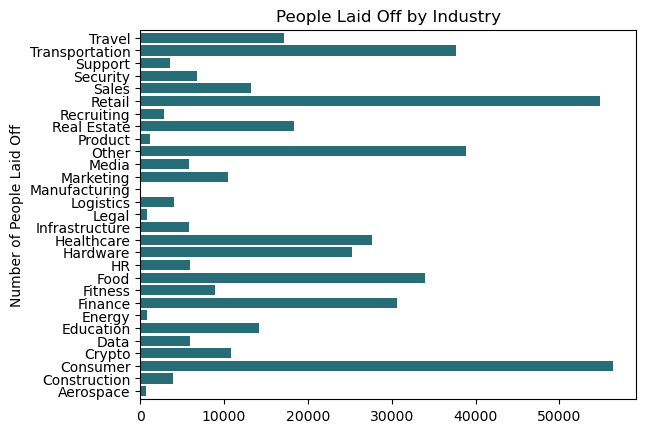

In [81]:
# All data - graphed
layoffs_ind.plot(kind='barh', width=0.8, color='#276d77', title="People Laid Off by Industry", xlabel="Number of People Laid Off", ylabel= "Industry")

In [82]:
# Number of people laid off by Industry - STEM
layoffs_ind1 = stem_df.groupby('industry').sum()['total_laid_off']
layoffs_ind1

industry
Consumer          25140
Crypto             3628
Data               3645
Education           458
Finance           12569
Fitness            4179
Food              14541
HR                 3782
Hardware          10278
Healthcare        11963
Infrastructure     4967
Legal               300
Logistics          1379
Marketing          3829
Media              2706
Other             28834
Product             633
Real Estate        7725
Recruiting         1835
Retail            40251
Sales              1757
Security           2335
Support            2269
Transportation    24941
Travel            11931
Name: total_laid_off, dtype: int64

<AxesSubplot:title={'center':'STEM Lay Offs by Industry'}, ylabel='Number of People Laid Off'>

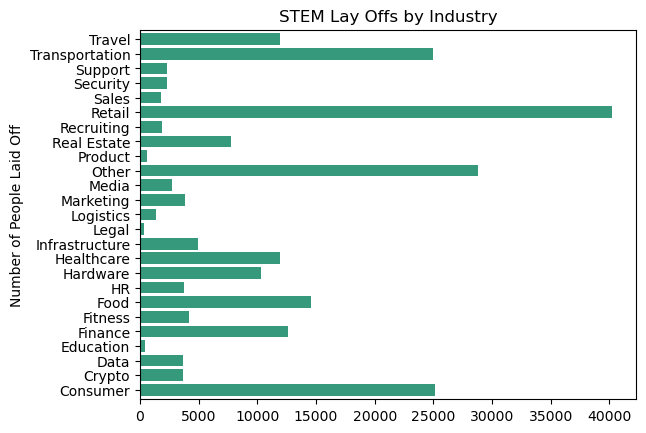

In [83]:
# STEM Graphed
layoffs_ind1.plot(kind='barh', width=0.8, color='#37997b', title="STEM Lay Offs by Industry", xlabel="Number of People Laid Off", ylabel= "Industry")

In [84]:
layoffs_ind = layoffs_df.groupby('industry').sum()['total_laid_off']
layoffs_ind1 = stem_df.groupby('industry').sum()['total_laid_off']

In [85]:
layoffs_df.head()

,company,location,industry,total_laid_off,percentage_laid_off,date,stage,country,year,month
0,N26,Berlin,Finance,71,4.0,2023-04-28,Series E,United States,2023,4
1,Providoor,Melbourne,Food,0,100.0,2023-04-28,Unknown,Australia,2023,4
2,Dropbox,SF Bay Area,Other,500,16.0,2023-04-27,Post-IPO,United States,2023,4
3,Vroom,New York City,Transportation,120,11.0,2023-04-27,Post-IPO,United States,2023,4
4,Greenhouse,New York City,Recruiting,100,12.0,2023-04-27,Private Equity,United States,2023,4


<AxesSubplot:title={'center':'Layoffs by Industry'}, xlabel='Industry', ylabel='Number of People Laid Off'>

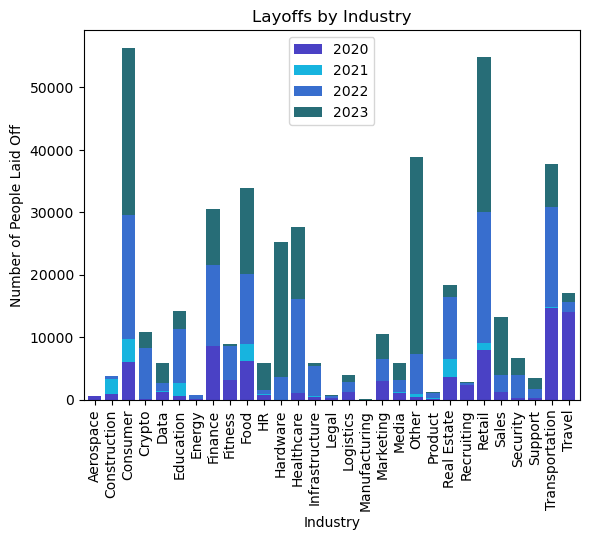

In [86]:
# Year over year graph of layoffs by industry
y2020 = layoffs_df[(layoffs_df["year"] == 2020)]
y2021 = layoffs_df[(layoffs_df["year"] == 2021)]
y2022 = layoffs_df[(layoffs_df["year"] == 2022)]
y2023 = layoffs_df[(layoffs_df["year"] == 2023)]

scores20 = y2020.groupby('industry').sum()['total_laid_off']
scores21 = y2021.groupby('industry').sum()['total_laid_off']
scores22 = y2022.groupby('industry').sum()['total_laid_off']
scores23 = y2023.groupby('industry').sum()['total_laid_off']

lay_year = pd.DataFrame({"2020": scores20, "2021": scores21,
                                    "2022": scores22, "2023": scores23})
lay_year.index.name = None

lay_year = lay_year.fillna(0)
lay_year.astype(int)

lay_year.plot(kind='bar', stacked=True, width=0.8, color=["#4a41c5", "#17b4df", "#386ece", "#276d77"], title="Layoffs by Industry", xlabel="Industry", ylabel="Number of People Laid Off")

In [88]:
# Get the industry names for the xaxis of the bar chart in Javascript: Layoffs by Industry (Xiaolin)
lay_year.index

Index(['Aerospace', 'Construction', 'Consumer', 'Crypto', 'Data', 'Education',
       'Energy', 'Finance', 'Fitness', 'Food', 'HR', 'Hardware', 'Healthcare',
       'Infrastructure', 'Legal', 'Logistics', 'Manufacturing', 'Marketing',
       'Media', 'Other', 'Product', 'Real Estate', 'Recruiting', 'Retail',
       'Sales', 'Security', 'Support', 'Transportation', 'Travel'],
      dtype='object')

In [89]:
# Get the 2020 data for the bar chart in Javascript: Layoffs by Industry (Xiaolin)
t = lay_year["2020"].tolist()
print(t)

[561.0, 896.0, 6063.0, 91.0, 1268.0, 685.0, 167.0, 8624.0, 3142.0, 6218.0, 782.0, 0.0, 1125.0, 377.0, 270.0, 1318.0, 0.0, 2958.0, 1150.0, 466.0, 199.0, 3699.0, 2382.0, 8002.0, 1304.0, 288.0, 324.0, 14656.0, 13983.0]


In [90]:
# Get the 2021 data for the bar chart in Javascript: Layoffs by Industry (Xiaolin)
t = lay_year["2021"].tolist()
print(t)

[0.0, 2434.0, 3600.0, 0.0, 90.0, 1943.0, 0.0, 0.0, 0.0, 2644.0, 80.0, 0.0, 0.0, 160.0, 0.0, 0.0, 0.0, 21.0, 83.0, 515.0, 22.0, 2900.0, 13.0, 1088.0, 0.0, 30.0, 0.0, 200.0, 0.0]


In [91]:
# Get the 2022 data for the bar chart in Javascript: Layoffs by Industry (Xiaolin)
t = lay_year["2022"].tolist()
print(t)

[100.0, 433.0, 19856.0, 8263.0, 1314.0, 8728.0, 635.0, 12999.0, 5546.0, 11288.0, 738.0, 3605.0, 15058.0, 4916.0, 350.0, 1473.0, 0.0, 3597.0, 1879.0, 6296.0, 861.0, 9932.0, 380.0, 20914.0, 2601.0, 3699.0, 1436.0, 15977.0, 1637.0]


In [92]:
# # Get the 2023 data for the bar chart in Javascript: Layoffs by Industry (Xiaolin)
t = lay_year["2023"].tolist()
print(t)

[0.0, 100.0, 26821.0, 2431.0, 3227.0, 2813.0, 0.0, 8959.0, 210.0, 13812.0, 4299.0, 21603.0, 11491.0, 422.0, 216.0, 1235.0, 158.0, 3902.0, 2757.0, 31531.0, 151.0, 1795.0, 115.0, 24821.0, 9311.0, 2753.0, 1763.0, 6859.0, 1539.0]


In [95]:
# Double check the dataset (Xiaolin)
lay_year

,2020,2021,2022,2023
Aerospace,561.0,0.0,100.0,0.0
Construction,896.0,2434.0,433.0,100.0
Consumer,6063.0,3600.0,19856.0,26821.0
Crypto,91.0,0.0,8263.0,2431.0
Data,1268.0,90.0,1314.0,3227.0
Education,685.0,1943.0,8728.0,2813.0
Energy,167.0,0.0,635.0,0.0
Finance,8624.0,0.0,12999.0,8959.0
Fitness,3142.0,0.0,5546.0,210.0
Food,6218.0,2644.0,11288.0,13812.0
